In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Understanding

In [3]:
df=pd.read_csv('sharks.csv')
df.head()

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,overcast.weather,time.of.day,shark,ID
0,13.11,3.421591,0.59601,34.66,6.718047,3.335635,81.0,0.69860,red,0,afternoon,1,245
1,11.99,2.874611,0.54274,19.39,6.242029,3.127024,49.0,0.62020,orange,0,morning,0,40
2,12.91,2.827774,0.52377,15.75,6.397929,3.052446,46.0,0.58235,red,0,night,0,424
3,12.06,2.772961,0.51963,13.25,6.278146,3.114239,43.0,0.57025,red,0,afternoon,1,17
4,15.06,3.271684,0.58815,47.14,6.932448,3.214831,83.0,0.71150,red,0,morning,1,283


In [4]:
df.shape

(456, 13)

In [5]:
df.dtypes

murkiness.level              float64
avg.dolphins.seen.per.day    float64
previous.week.fishing        float64
diversity.of.prey            float64
seals.seen                   float64
water.temp                   float64
people.previous.day          float64
seagull.density              float64
common.surfboard.colour       object
overcast.weather               int64
time.of.day                   object
shark                          int64
ID                             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   murkiness.level            456 non-null    float64
 1   avg.dolphins.seen.per.day  455 non-null    float64
 2   previous.week.fishing      455 non-null    float64
 3   diversity.of.prey          455 non-null    float64
 4   seals.seen                 456 non-null    float64
 5   water.temp                 455 non-null    float64
 6   people.previous.day        453 non-null    float64
 7   seagull.density            456 non-null    float64
 8   common.surfboard.colour    456 non-null    object 
 9   overcast.weather           456 non-null    int64  
 10  time.of.day                456 non-null    object 
 11  shark                      456 non-null    int64  
 12  ID                         456 non-null    int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 4

In [7]:
df.describe(include="all")

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,overcast.weather,time.of.day,shark,ID
count,456.000000,455.000000,455.000000,455.000000,456.000000,455.000000,453.000000,456.000000,456,456.000000,456,456.000000,456.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,4,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,NaN,night,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,172,NaN,NaN
mean,22.857656,3.010865,0.549480,41.681767,6.623185,3.132817,61.249448,0.613652,NaN,0.004386,NaN,0.368421,228.50000
std,130.770478,0.317467,0.040428,49.059173,0.563944,0.081336,27.191830,0.067054,NaN,0.066154,NaN,0.482906,131.78012
min,6.981000,2.718282,0.500000,6.802000,5.221436,2.926373,34.000000,0.500000,NaN,0.000000,NaN,0.000000,1.00000
25%,11.697500,2.796446,0.519315,17.740000,6.244118,3.076468,45.000000,0.562885,NaN,0.000000,NaN,0.000000,114.75000
50%,13.275000,2.888364,0.533340,24.600000,6.516562,3.127381,53.000000,0.598840,NaN,0.000000,NaN,0.000000,228.50000
75%,16.040000,3.123109,0.576595,45.410000,6.989334,3.181002,69.000000,0.661300,NaN,0.000000,NaN,1.000000,342.25000


array([[<AxesSubplot:title={'center':'murkiness.level'}>,
        <AxesSubplot:title={'center':'avg.dolphins.seen.per.day'}>,
        <AxesSubplot:title={'center':'previous.week.fishing'}>],
       [<AxesSubplot:title={'center':'diversity.of.prey'}>,
        <AxesSubplot:title={'center':'seals.seen'}>,
        <AxesSubplot:title={'center':'water.temp'}>],
       [<AxesSubplot:title={'center':'people.previous.day'}>,
        <AxesSubplot:title={'center':'seagull.density'}>,
        <AxesSubplot:title={'center':'overcast.weather'}>],
       [<AxesSubplot:title={'center':'shark'}>,
        <AxesSubplot:title={'center':'ID'}>, <AxesSubplot:>]],
      dtype=object)

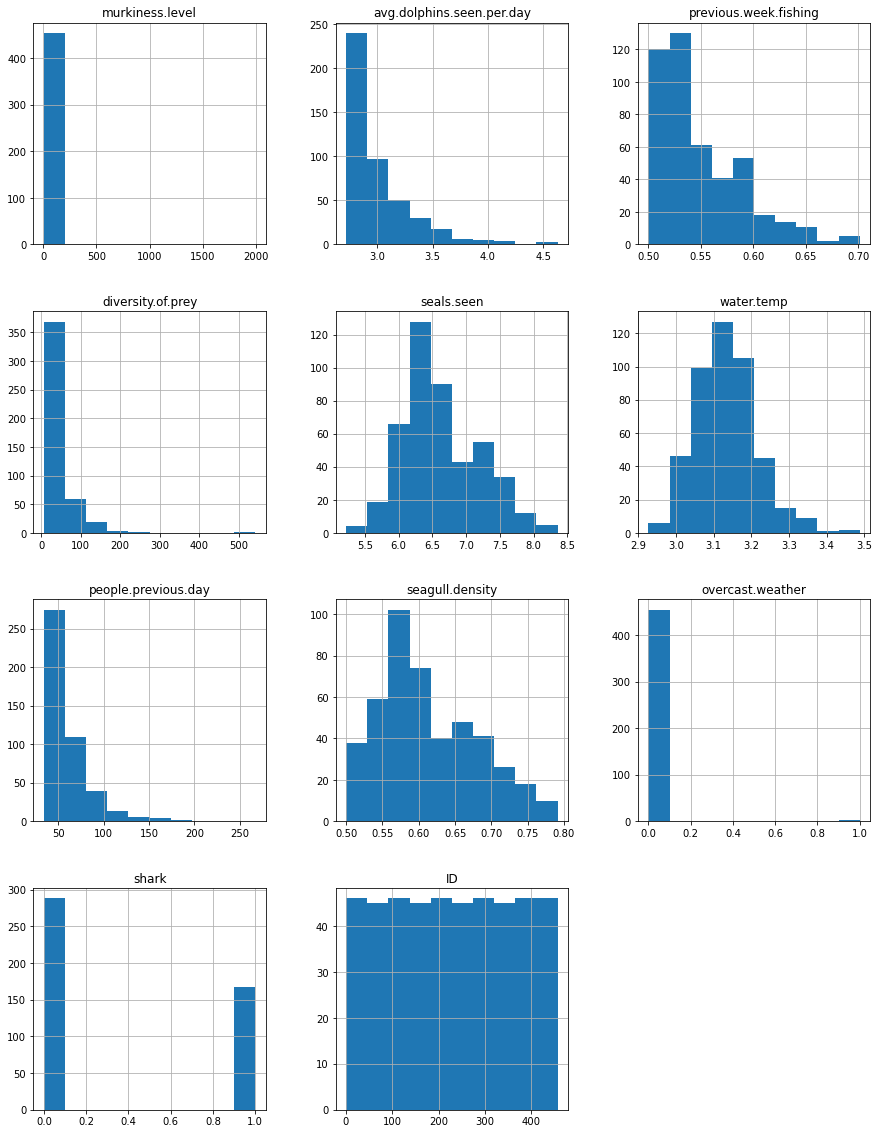

In [8]:
df.hist(figsize = (15,20))

In [9]:
df['diversity.of.prey'].nlargest()

143    542.2
161    525.6
125    233.0
256    224.1
118    199.7
Name: diversity.of.prey, dtype: float64

In [10]:
df.isnull().sum().sort_values(ascending=False)

people.previous.day          3
avg.dolphins.seen.per.day    1
previous.week.fishing        1
diversity.of.prey            1
water.temp                   1
murkiness.level              0
seals.seen                   0
seagull.density              0
common.surfboard.colour      0
overcast.weather             0
time.of.day                  0
shark                        0
ID                           0
dtype: int64

common.surfboard.colour


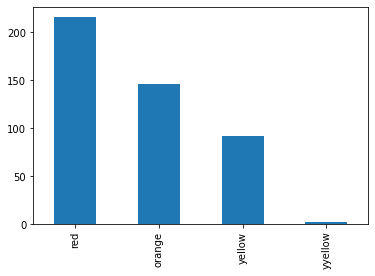

time.of.day


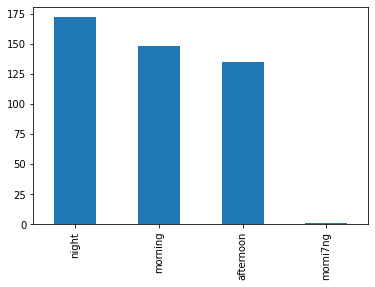

In [11]:
for col in df.select_dtypes(include=object).columns: 
        print(col)
        df[col].value_counts(dropna=False).plot(kind='bar')
        plt.show()

In [12]:
# define the list
selected_features = ['murkiness.level','avg.dolphins.seen.per.day','previous.week.fishing','diversity.of.prey','seals.seen','water.temp','people.previous.day','seagull.density','common.surfboard.colour','time.of.day','shark']

df_cleaned=df[selected_features]
df_cleaned

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,time.of.day,shark
0,13.110,3.421591,0.59601,34.66,6.718047,3.335635,81.0,0.69860,red,afternoon,1
1,11.990,2.874611,0.54274,19.39,6.242029,3.127024,49.0,0.62020,orange,morning,0
2,12.910,2.827774,0.52377,15.75,6.397929,3.052446,46.0,0.58235,red,night,0
3,12.060,2.772961,0.51963,13.25,6.278146,3.114239,43.0,0.57025,red,afternoon,1
4,15.060,3.271684,0.58815,47.14,6.932448,3.214831,83.0,0.71150,red,morning,1
...,...,...,...,...,...,...,...,...,...,...,...
451,11.340,2.865292,0.51899,16.41,6.250168,3.271296,54.0,0.58278,yellow,afternoon,0
452,13.700,2.847752,0.53160,20.64,6.531606,3.087569,44.0,0.59077,yellow,night,0
453,9.720,2.718282,0.50000,21.69,5.716370,2.926373,34.0,0.50000,yellow,afternoon,0
454,13.170,2.962686,0.55252,14.49,6.607596,3.196904,78.0,0.66070,red,night,1


In [13]:
#Preparation

In [14]:
df_copy = df_cleaned.copy()
df_train = df_copy.sample(frac=0.80, random_state=0)
df_test = df_copy.drop(df_train.index)

In [15]:
df_train

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,time.of.day,shark
102,13.850,2.757436,0.511410,17.910,6.587412,3.073015,44.0,0.55104,yellow,night,0
60,11.610,2.925745,0.544970,15.890,6.164787,3.164517,54.0,0.61050,orange,night,0
278,10.860,2.718282,0.500000,20.670,6.021751,3.020074,38.0,0.50000,orange,night,0
144,12.450,3.212205,0.548460,30.190,6.364062,3.079236,81.0,0.63420,red,night,0
179,13.850,2.755256,0.522930,29.630,6.618872,3.059615,42.0,0.55890,red,afternoon,0
...,...,...,...,...,...,...,...,...,...,...,...
207,12.680,3.063040,0.568730,36.460,6.789310,3.331221,81.0,0.67160,red,morning,1
279,9.777,2.841389,0.517780,22.870,5.905362,3.183581,49.0,0.55334,red,afternoon,0
227,12.180,2.749154,0.505051,15.820,6.240471,3.020074,36.0,0.51852,yellow,morning,0
148,11.540,2.755955,0.508907,9.438,6.148041,3.050744,47.0,0.54715,orange,afternoon,0


In [16]:
df_train['time.of.day'] = df_train['time.of.day'].replace({'morni7ng':'morning'})

In [17]:
df_train['common.surfboard.colour'] = df_train['common.surfboard.colour'].replace({'yyellow':'yellow'})

common.surfboard.colour


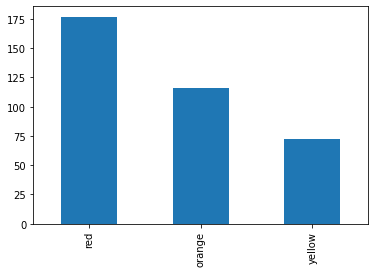

time.of.day


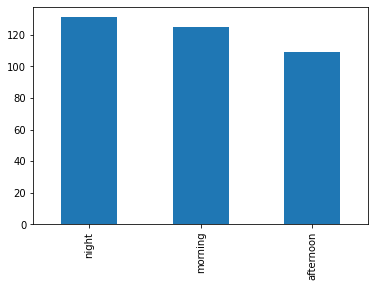

In [18]:
for col in df_train.select_dtypes(include=object).columns: 
        print(col)
        df_train[col].value_counts(dropna=False).plot(kind='bar')
        plt.show()

In [19]:
df_train['diversity.of.prey'].nlargest()

143    542.2
161    525.6
125    233.0
256    224.1
118    199.7
Name: diversity.of.prey, dtype: float64

In [20]:
df_train.drop(143, axis=0, inplace=True)
df_train.drop(161,axis=0,inplace=True)

In [21]:
df_train['diversity.of.prey'].nlargest()

125    233.0
256    224.1
118    199.7
374    180.2
134    176.5
Name: diversity.of.prey, dtype: float64

<AxesSubplot:>

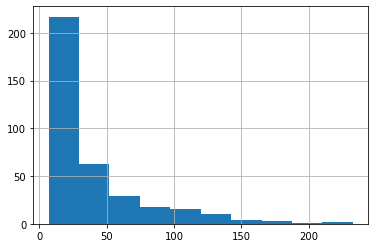

In [22]:
df_train['diversity.of.prey'].hist()

In [23]:
median=df_train['people.previous.day'].median()
df_train['people.previous.day']=df_train['people.previous.day'].replace(np.nan,median)

median=df_train['avg.dolphins.seen.per.day'].median()
df_train['avg.dolphins.seen.per.day']=df_train['avg.dolphins.seen.per.day'].replace(np.nan,median)

median=df_train['previous.week.fishing'].median()
df_train['previous.week.fishing']=df_train['previous.week.fishing'].replace(np.nan,median)

median=df_train['diversity.of.prey'].median()
df_train['diversity.of.prey']=df_train['diversity.of.prey'].replace(np.nan,median)

median=df_train['water.temp'].median()
df_train['water.temp']=df_train['water.temp'].replace(np.nan,median)

In [24]:
df_train.isnull().sum().sort_values(ascending=False)

murkiness.level              0
avg.dolphins.seen.per.day    0
previous.week.fishing        0
diversity.of.prey            0
seals.seen                   0
water.temp                   0
people.previous.day          0
seagull.density              0
common.surfboard.colour      0
time.of.day                  0
shark                        0
dtype: int64

In [25]:
df_train = pd.get_dummies(df_train, prefix_sep='_', drop_first=True)
df_train

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,shark,common.surfboard.colour_red,common.surfboard.colour_yellow,time.of.day_morning,time.of.day_night
102,13.850,2.757436,0.511410,17.910,6.587412,3.073015,44.0,0.55104,0,0,1,0,1
60,11.610,2.925745,0.544970,15.890,6.164787,3.164517,54.0,0.61050,0,0,0,0,1
278,10.860,2.718282,0.500000,20.670,6.021751,3.020074,38.0,0.50000,0,0,0,0,1
144,12.450,3.212205,0.548460,30.190,6.364062,3.079236,81.0,0.63420,0,1,0,0,1
179,13.850,2.755256,0.522930,29.630,6.618872,3.059615,42.0,0.55890,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,17.350,2.799195,0.528370,44.410,7.104965,3.101903,46.0,0.58235,1,0,1,1,0
207,12.680,3.063040,0.568730,36.460,6.789310,3.331221,81.0,0.67160,1,1,0,1,0
279,9.777,2.841389,0.517780,22.870,5.905362,3.183581,49.0,0.55334,0,1,0,0,0
227,12.180,2.749154,0.505051,15.820,6.240471,3.020074,36.0,0.51852,0,0,1,1,0


In [26]:
feature_names=df_train.columns[df_train.columns != 'shark']
X_train=df_train[feature_names].values
y_train=df_train['shark'].values

In [27]:
# normalise...
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)

In [28]:
X_train

array([[0.00308756, 0.02049165, 0.05670974, ..., 1.        , 0.        ,
        1.        ],
       [0.00195766, 0.10857704, 0.22350895, ..., 0.        , 0.        ,
        1.        ],
       [0.00157934, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.00103305, 0.06442878, 0.08836978, ..., 0.        , 0.        ,
        0.        ],
       [0.00224518, 0.01615725, 0.02510437, ..., 1.        , 1.        ,
        0.        ],
       [0.00192235, 0.01971627, 0.04426938, ..., 0.        , 0.        ,
        0.        ]])

In [29]:
#Development

In [30]:
from sklearn.linear_model import LogisticRegression

Solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for i in Solvers:
           log_reg = LogisticRegression(solver=i, penalty='l2')
           score = np.mean(cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy'))
           print("Average accuracy for logistic regression with", str(i),"solver:", str(score))
           

#https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#https://www.statology.org/high-dimensional-data/
#varied penalty but did nothing

Average accuracy for logistic regression with newton-cg solver: 0.8870243531202435
Average accuracy for logistic regression with lbfgs solver: 0.8870243531202435
Average accuracy for logistic regression with liblinear solver: 0.8815068493150685
Average accuracy for logistic regression with sag solver: 0.8870243531202435
Average accuracy for logistic regression with saga solver: 0.8870243531202435


In [31]:
log_reg_tuned = LogisticRegression(solver='lbfgs', penalty='l2')
log_reg_tuned

# https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

LogisticRegression()

In [32]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

for d in range(1,21):
           Dec_Tree = DecisionTreeClassifier(max_depth=d)
           score = np.mean(cross_val_score(Dec_Tree, X_train, y_train, cv=5, scoring='accuracy'))
           print("Average accuracy for decision tree with max depth " + str(d),"=", str(score))     
        
#https://www.section.io/engineering-education/hyperparmeter-tuning/

Average accuracy for decision tree with max depth 1 = 0.8567732115677321
Average accuracy for decision tree with max depth 2 = 0.8788432267884323
Average accuracy for decision tree with max depth 3 = 0.881544901065449
Average accuracy for decision tree with max depth 4 = 0.8678462709284626
Average accuracy for decision tree with max depth 5 = 0.8623287671232877
Average accuracy for decision tree with max depth 6 = 0.845814307458143
Average accuracy for decision tree with max depth 7 = 0.8568873668188737
Average accuracy for decision tree with max depth 8 = 0.8568112633181126
Average accuracy for decision tree with max depth 9 = 0.8541095890410958
Average accuracy for decision tree with max depth 10 = 0.8402587519025875
Average accuracy for decision tree with max depth 11 = 0.8430365296803652
Average accuracy for decision tree with max depth 12 = 0.8431126331811262
Average accuracy for decision tree with max depth 13 = 0.8293378995433789
Average accuracy for decision tree with max depth

In [33]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_clf = RandomForestClassifier(n_estimators=100, random_state=1) 
score = np.mean(cross_val_score(rand_forest_clf, X_train, y_train, cv=5, scoring='accuracy'))
print("Average accuracy: "  + str(score))

# https://stats.stackexchange.com/questions/558060/range-of-values-for-hyperparameter-fine-tuning-in-random-forest-classification

Average accuracy: 0.88162100456621


In [34]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {'n_estimators':[50, 100, 150, 200], 'max_features':[5,6,7,8],'max_depth':[3,4,5,6]}

gs = GridSearchCV(rf, param_grid, cv=5, return_train_score=True)

gs.fit(X_train, y_train)

rf_model_tuned = gs.best_estimator_

print(rf_model_tuned)
print("Mean cross-validated score of the best_estimator:" + str(gs.best_score_))     # Average accuracy
print("Best Hyperparameters found: " + str(gs.best_params_))

# Notes:
# https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee#:~:text=The%20scoring%20metric%20can%20be%20any%20metric%20of,is%20where%20the%20limitations%20come%20in%20to%20play.

RandomForestClassifier(max_depth=3, max_features=6)
Mean cross-validated score of the best_estimator:0.9007990867579909
Best Hyperparameters found: {'max_depth': 3, 'max_features': 6, 'n_estimators': 100}


In [35]:
scores=gs.cv_results_

for param,mean_train,mean_val in zip(scores['params'],scores['mean_train_score'],scores['mean_test_score']):
            print(param,'Accuracy on training:', mean_train,'Accuracy on validation:', mean_val)

{'max_depth': 3, 'max_features': 5, 'n_estimators': 50} Accuracy on training: 0.9304396255480507 Accuracy on validation: 0.8843607305936072
{'max_depth': 3, 'max_features': 5, 'n_estimators': 100} Accuracy on training: 0.93181182604574 Accuracy on validation: 0.8871004566210047
{'max_depth': 3, 'max_features': 5, 'n_estimators': 150} Accuracy on training: 0.9331935063396137 Accuracy on validation: 0.8925799086757991
{'max_depth': 3, 'max_features': 5, 'n_estimators': 200} Accuracy on training: 0.9331911363905677 Accuracy on validation: 0.8925799086757991
{'max_depth': 3, 'max_features': 6, 'n_estimators': 50} Accuracy on training: 0.9311269107714184 Accuracy on validation: 0.8925799086757991
{'max_depth': 3, 'max_features': 6, 'n_estimators': 100} Accuracy on training: 0.9352577319587629 Accuracy on validation: 0.9007990867579909
{'max_depth': 3, 'max_features': 6, 'n_estimators': 150} Accuracy on training: 0.9325038511672 Accuracy on validation: 0.8871004566210047
{'max_depth': 3, 'ma

In [36]:
from sklearn.model_selection import KFold
# Determine the splits
splits = KFold(n_splits=5)
splits

KFold(n_splits=5, random_state=None, shuffle=False)

In [37]:
from sklearn.neural_network import MLPClassifier

# Define the Param Grid
param_grid = {"hidden_layer_sizes": [(5), (10), (100)],
              "activation": ['logistic', 'tanh', 'relu'],
              "solver": ['lbfgs','sgd','adam'],
              "alpha": [0.01, 0.001],
              "max_iter":[100,500,1000,2000]}

mlp_model = MLPClassifier()

# Determine the splits and perform the grid search
grid = GridSearchCV(mlp_model, param_grid, cv=splits, return_train_score=True, n_jobs=-1).fit(X_train, y_train)

# Select the best estimators
mlp_model_tuned=grid.best_estimator_

# Output the results
print(mlp_model_tuned)
print("Mean cross-validated score of the best_estimator: " + str(grid.best_score_))     # Average accuracy
print("Best Hyperparameters found: " + str(grid.best_params_))

#https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=100,
              max_iter=1000)
Mean cross-validated score of the best_estimator: 0.8926179604261796
Best Hyperparameters found: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'max_iter': 1000, 'solver': 'adam'}


In [38]:
scores=grid.cv_results_

for param,mean_train,mean_val in zip(scores['params'],scores['mean_train_score'],scores['mean_test_score']):
            print(param, 'Accuracy on training:', mean_train, 'Accuracy on validation:', mean_val)

{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 5, 'max_iter': 100, 'solver': 'lbfgs'} Accuracy on training: 0.9311387605166489 Accuracy on validation: 0.8733257229832571
{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 5, 'max_iter': 100, 'solver': 'sgd'} Accuracy on training: 0.6273942410238179 Accuracy on validation: 0.6198249619482497
{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 5, 'max_iter': 100, 'solver': 'adam'} Accuracy on training: 0.627420310463325 Accuracy on validation: 0.6253044140030442
{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 5, 'max_iter': 500, 'solver': 'lbfgs'} Accuracy on training: 0.9628154994667615 Accuracy on validation: 0.881468797564688
{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 5, 'max_iter': 500, 'solver': 'sgd'} Accuracy on training: 0.6198341035667733 Accuracy on validation: 0.6198249619482497
{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 5, 'max_

In [39]:
from sklearn.model_selection import cross_validate

metrics_to_calculate = ['accuracy', 'roc_auc', 'precision', 'f1','recall']

mlp_scores = cross_validate(mlp_model_tuned, X_train, y_train, cv=5, scoring=metrics_to_calculate)
print("Average test accuracy:",np.mean(mlp_scores['test_accuracy']))
print("Average test roc_auc:",np.mean(mlp_scores['test_roc_auc']))
print("Average test precision:",np.mean(mlp_scores['test_precision']))
print("Average test f1:",np.mean(mlp_scores['test_f1']))                                         
print("Average test recall:",np.mean(mlp_scores['test_recall']))

Average test accuracy: 0.8843226788432268
Average test roc_auc: 0.9236919459141681
Average test precision: 0.8730888596105988
Average test f1: 0.8394969917756804
Average test recall: 0.8187830687830688


In [40]:
metrics_to_calculate = ['accuracy', 'roc_auc', 'precision', 'f1','recall']

rf_scores = cross_validate(rf_model_tuned, X_train, y_train, cv=5, scoring=metrics_to_calculate)
print("Average test accuracy:",np.mean(rf_scores['test_accuracy']))
print("Average test roc_auc:",np.mean(rf_scores['test_roc_auc']))
print("Average test precision:",np.mean(rf_scores['test_precision']))
print("Average test f1:",np.mean(rf_scores['test_f1']))                                         
print("Average test recall:",np.mean(rf_scores['test_recall']))

Average test accuracy: 0.8843607305936072
Average test roc_auc: 0.9266637272192828
Average test precision: 0.8704034391534391
Average test f1: 0.8436952558801298
Average test recall: 0.8261904761904763


In [41]:
metrics_to_calculate = ['accuracy', 'roc_auc', 'precision', 'f1','recall']

log_scores = cross_validate(log_reg_tuned, X_train, y_train, cv=5, scoring=metrics_to_calculate)
print("Average test accuracy:",np.mean(log_scores['test_accuracy']))
print("Average test roc_auc:",np.mean(log_scores['test_roc_auc']))
print("Average test precision:",np.mean(log_scores['test_precision']))
print("Average test f1:",np.mean(log_scores['test_f1']))                                         
print("Average test recall:",np.mean(log_scores['test_recall']))

Average test accuracy: 0.8870243531202435
Average test roc_auc: 0.9254497354497355
Average test precision: 0.9202564581388112
Average test f1: 0.8344929302376111
Average test recall: 0.7751322751322751


In [42]:
print(

SyntaxError: unexpected EOF while parsing (149104261.py, line 1)

In [43]:
rf=RandomForestClassifier(max_depth=3, max_features=6)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=6)

In [ ]:
#Evaluation

In [44]:
df_test

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,time.of.day,shark
9,1990.200,2.957322,0.52800,14.66,6.449048,3.028106,58.0,0.58978,red,night,0
25,13.440,2.805519,0.52031,20.53,6.669371,3.051424,52.0,0.61120,red,night,1
28,10.480,2.901999,0.52218,20.77,6.087683,3.132738,64.0,0.59310,orange,night,0
31,9.667,2.800839,0.51514,22.73,5.953763,3.099798,NaN,0.56560,yellow,night,0
32,13.470,2.885120,0.55266,12.84,6.492543,3.156516,NaN,0.63350,orange,afternoon,0
...,...,...,...,...,...,...,...,...,...,...,...
424,12.460,3.508562,0.58543,23.94,6.567235,3.332022,267.0,0.72100,red,afternoon,1
427,19.530,3.068880,NaN,109.90,7.814803,3.161967,81.0,0.66250,orange,afternoon,1
440,17.990,3.088266,0.58824,49.81,7.207119,3.189119,75.0,0.69740,yellow,night,1
442,20.590,3.471485,0.61210,75.09,7.473069,3.182475,73.0,0.71130,orange,night,1


In [45]:
df_test.shape

(91, 11)

In [46]:
df_test['diversity.of.prey'].nlargest()

251    158.7
243    153.4
323    112.4
376    111.4
427    109.9
Name: diversity.of.prey, dtype: float64

In [47]:
df_test['time.of.day'] = df_test['time.of.day'].replace({'morni7ng':'morning'})
df_test['common.surfboard.colour'] = df_test['common.surfboard.colour'].replace({'yyellow':'yellow'})
df_test['diversity.of.prey'].nlargest()

#df_test.drop(143, axis=0, inplace=True)
#df_test.drop(161,axis=0,inplace=True)

median=df_test['people.previous.day'].median()
df_test['people.previous.day']=df_test['people.previous.day'].replace(np.nan,median)

median=df_test['avg.dolphins.seen.per.day'].median()
df_test['avg.dolphins.seen.per.day']=df_test['avg.dolphins.seen.per.day'].replace(np.nan,median)

median=df_test['previous.week.fishing'].median()
df_test['previous.week.fishing']=df_test['previous.week.fishing'].replace(np.nan,median)

median=df_test['diversity.of.prey'].median()
df_test['diversity.of.prey']=df_test['diversity.of.prey'].replace(np.nan,median)

median=df_test['water.temp'].median()
df_test['water.temp']=df_test['water.temp'].replace(np.nan,median)

df_test = pd.get_dummies(df_test, prefix_sep='_', drop_first=True)
df_test

feature_names=df_test.columns[df_test.columns != 'shark']
X_test=df_test[feature_names].values
y_test=df_test['shark'].values

X_test = mm_scaler.transform(X_test)

In [48]:
X_test

array([[1.        , 0.12510331, 0.13916501, ..., 0.        , 0.        ,
        1.        ],
       [0.00288075, 0.04565632, 0.10094433, ..., 0.        , 0.        ,
        1.        ],
       [0.00138766, 0.09614939, 0.11023857, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.00517586, 0.19363343, 0.43856859, ..., 1.        , 0.        ,
        1.        ],
       [0.00648736, 0.39419371, 0.55715706, ..., 0.        , 0.        ,
        1.        ],
       [0.00274455, 0.12791076, 0.2610338 , ..., 0.        , 0.        ,
        1.        ]])

In [49]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [50]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred,labels = rf.classes_)
matrix

# Notes:
# rf.classes_ gives array([0, 1], dtype=int64)

array([[59,  4],
       [ 4, 24]], dtype=int64)

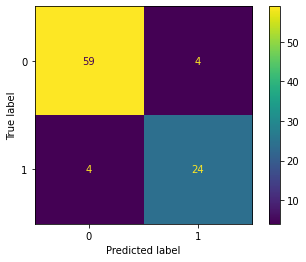

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

matrix2 = ConfusionMatrixDisplay(matrix, display_labels = rf.classes_)
matrix2.plot()

In [53]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))

# https://aigraduate.com/understanding-ml-evaluation-metrics---precision---recall/

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.86      0.86      0.86        28

    accuracy                           0.91        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.91      0.91      0.91        91



In [54]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted') 

0.9120879120879121

In [55]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

#In multilabel classification, accuracy classification score is a function that computes subset accuracy. 
#This function is equal to the jaccard_score function. 
#Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

Test set Accuracy:  0.9120879120879121


In [56]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=rf.classes_[1])

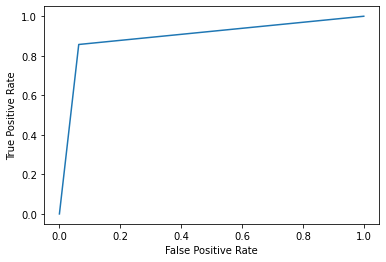

In [57]:
from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py